# Mục mới

In [1]:
!gdown https://drive.google.com/uc?id=1mZ5Qy7dJH9BlYzLHEmVanqWbPJv3ro0P

'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('btc_price_per_mi.csv')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'btc_price_per_mi.csv'

In [7]:
import pandas as pd
data['date'] = pd.to_datetime(data['date'],unit='ms')
data

,date,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_base_asset_volume.1,ignore
0,2017-08-17 04:00:00,4261.48,4261.48,4261.48,4261.48,1.775183,1502942459999,7564.906851,3,0.075183,320.390851,0
1,2017-08-17 04:01:00,4261.48,4261.48,4261.48,4261.48,0.000000,1502942519999,0.000000,0,0.000000,0.000000,0
2,2017-08-17 04:02:00,4280.56,4280.56,4280.56,4280.56,0.261074,1502942579999,1117.542921,2,0.261074,1117.542921,0
3,2017-08-17 04:03:00,4261.48,4261.48,4261.48,4261.48,0.012008,1502942639999,51.171852,3,0.012008,51.171852,0
4,2017-08-17 04:04:00,4261.48,4261.48,4261.48,4261.48,0.140796,1502942699999,599.999338,1,0.140796,599.999338,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2958152,2023-04-08 10:24:00,28023.44,28023.44,28023.43,28023.44,7.146780,1680949499999,200277.314635,263,2.557910,71681.437410,0
2958153,2023-04-08 10:25:00,28023.43,28023.44,28022.87,28022.88,5.879990,1680949559999,164774.320883,258,2.273930,63722.081412,0
2958154,2023-04-08 10:26:00,28022.87,28022.88,28017.57,28017.57,8.998460,1680949619999,252125.712592,379,1.289000,36115.780462,0
2958155,2023-04-08 10:27:00,28017.57,28017.58,28017.43,28017.43,6.703220,1680949679999,187807.222123,253,2.596170,72738.073843,0


# Ex1: Event-based backtest: Vào lệnh Long mỗi khi giá phút sau cao hơn giá phút trước 10 điểm, thoát sau 5 phút

In [9]:
ex1 = pd.DataFrame()
ex1['price'] = data['close']
ex1['price_diff'] = ex1['price'] - ex1['price'].shift(1)
ex1['condition_match'] = (ex1['price_diff']<10).astype(int)
ex1['enter_price'] = ex1['price']*ex1['condition_match']
ex1['exit_price'] = ex1['price'].shift(-5)*ex1['condition_match']
ex1['gain'] = ex1['exit_price'] - ex1['enter_price']
ex1['total_gain'] = ex1['gain'].cumsum()
ex1

,price,price_diff,condition_match,enter_price,exit_price,gain,total_gain
0,4261.48,NaN,0,0.00,0.00,0.0,0.0
1,4261.48,0.00,1,4261.48,4261.48,0.0,0.0
2,4280.56,19.08,0,0.00,0.00,0.0,0.0
3,4261.48,-19.08,1,4261.48,4261.48,0.0,0.0
4,4261.48,0.00,1,4261.48,4261.48,0.0,0.0
...,...,...,...,...,...,...,...
2958152,28023.44,0.00,1,28023.44,NaN,NaN,NaN
2958153,28022.88,-0.56,1,28022.88,NaN,NaN,NaN
2958154,28017.57,-5.31,1,28017.57,NaN,NaN,NaN
2958155,28017.43,-0.14,1,28017.43,NaN,NaN,NaN


#Plot lãi lỗ

<Axes: >

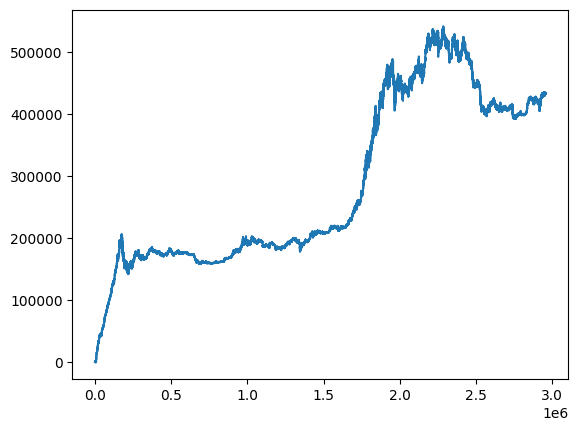

In [10]:
ex1['total_gain'].plot()

# Ex2: Vectorized backtest: Tĩnh lãi lỗ cho chiến thuật dựa vào vị thế trên thị trường qua thời gian. Demo sẽ cho vị thế giả dụ được sinh ra ngẫu nhiên

In [11]:
import numpy as np
def backtest_position(position, price):
    a = pd.DataFrame()
    pos = pd.Series(position)
    pr = pd.Series(price)
    pos_long = np.where(pos>0, pos, 0)
    pos_short = np.where(pos<0, pos, 0)
    pnl_long = (pr.shift(-1)-pr) * pos_long
    pnl_short = (pr.shift(-1)-pr) * pos_short
    return pnl_long + pnl_short

In [18]:
ex2 = pd.DataFrame()
ex2['price'] = data['close']
ex2['position'] = [np.random.randint(-5,5) for i in range(len(ex1))]
ex2.head()

,price,position
0,4261.48,4
1,4261.48,2
2,4280.56,4
3,4261.48,-3
4,4261.48,1


In [17]:
ex2['pnl'] = backtest_position(ex2['position'], ex2['price'])
ex2['total_gain'] = ex2['pnl'].cumsum()

<Axes: >

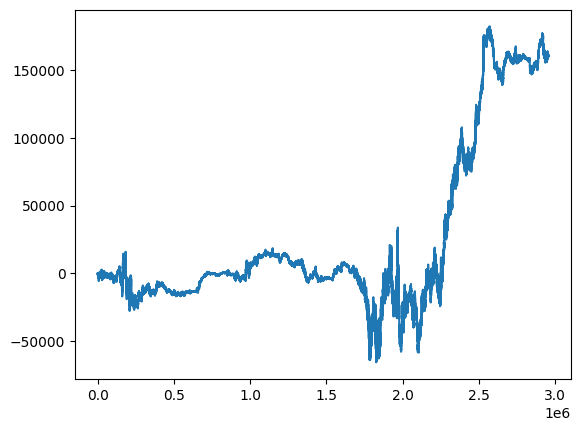

In [16]:
ex2['total_gain'].plot()